In [37]:
import random
from scipy.io import loadmat
import h5py
import numpy as np
from PIL import Image

IMAGE_PATH = "/Volumes/Rembr2Eject/nsd_stimuli.hdf5"
EXP_PATH = "stimulus/nsd_expdesign.mat"


In [38]:
def getImages(subj, session, n_images, num_blocks):
    totalImages = n_images * num_blocks
    # Mapping from integer id to NSD id
    mat = loadmat(EXP_PATH)
    subjectim = mat['subjectim'] # 1-indexed
    sessionGroup = (int(session)-1) % 3
    image_indices = subjectim[int(subj)-1][sessionGroup*totalImages : (sessionGroup + 1)*totalImages]
    import pdb
    pdb.set_trace()
    image_indices = image_indices -1 # img_map is 1-indexed
    sorted_indices = np.argsort(image_indices)
    inverse_indices = np.argsort(sorted_indices)  # To revert back to original order

    with h5py.File(IMAGE_PATH, 'r') as file:
        dataset = file["imgBrick"]
        sorted_images = dataset[image_indices[sorted_indices], :, :, :]  # Assuming index is within the valid range for dataset # pyright: ignore
        images = sorted_images[inverse_indices]
        pil_images = [Image.fromarray(img) for img in images]
    return pil_images

In [39]:
# Parameters
n_images = 208  # Number of unique images per block
n_oddballs = 24  # Number of oddball images per block
num_blocks = 16  # Number of blocks

subj = 1
session = 5
images = getImages(subj, session, n_images, num_blocks)
print(subj, session, n_images, num_blocks)
print(np.array(images[0])[0])

> /var/folders/14/hz9wkgxn73dbs6fw9cz1vlsr0000gn/T/ipykernel_3165/3964757156.py(10)getImages()
      8     import pdb
      9     pdb.set_trace()
---> 10     image_indices = image_indices -1 # img_map is 1-indexed
     11     sorted_indices = np.argsort(image_indices)
     12     inverse_indices = np.argsort(sorted_indices)  # To revert back to original order

3328
3328
3328


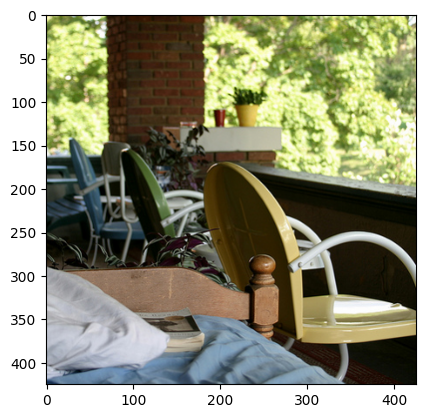

In [33]:
import matplotlib.pyplot as plt
plt.imshow(images[0])

In [2]:
import time
int(time.time() * 1000)

1715032091937